Rejection sampling is a useful method for generating random samples from a distribution
$f(x)$ that may be hard to sample from. The idea is to generate samples from a known distribution $g(x)$, and then either to accept or reject the samples. The criterion for acceptance and rejection, and the algorithm are described here

https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html

I this code we want to use the uniform density on the unit interval as a candidate density to generate samples from the beta distribution.

In [2]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns

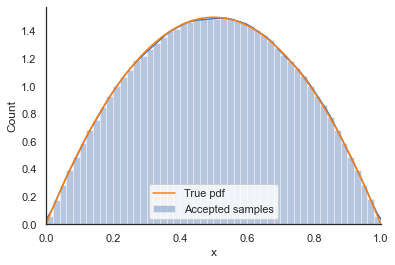

Proportion of samples accepted: 0.666165


In [7]:
# Set seed for reproducibility
seed = 512
random.seed(seed)

# Pick alpha and beta such that the tails of g~U(0,1) are heavier.
alpha = 2.
beta = 2.
B = gamma(alpha)*gamma(beta)/gamma(alpha+beta)  
c = 1.001  # sup(f/g) 

Num_samples = 10**6  # Number of samples

U = np.random.uniform(0,1,(Num_samples,1))  # Samples to accept or reject
X = np.random.uniform(0,1,(Num_samples,1))  # Samples from candidate density g ~ U(0,1)
g = 1  # density of U(0,1)
accepted_samples = []

for i in range(Num_samples):
    x = X[i,0]
    f = (x**(alpha-1) * (1-x**(beta-1)))/B  
    if U[i,0] < f/(g*c):
        accepted_samples.append(x)
        c = np.max((c,f/g))

accepted_samples = np.array(accepted_samples)


## Plot results
sns.set()
sns.set_style('whitegrid')
sns.set_style('white')

xt = np.linspace(0, 1, num=10**4)
f_density = (xt**(alpha-1) * (1-xt**(beta-1)))/B

sns.distplot(accepted_samples, hist=True, label='Accepted samples') # Distribution of accepted samples
plt.plot(xt, f_density/np.sum(f_density[:-1]*np.diff(xt)), color='tab:orange',label='True pdf')  # True density

plt.xlim((0,1))
plt.xlabel('x')
plt.ylabel('Count')
plt.legend()
sns.despine()
plt.show()

print('Proportion of samples accepted:',
      len(accepted_samples)/Num_samples )

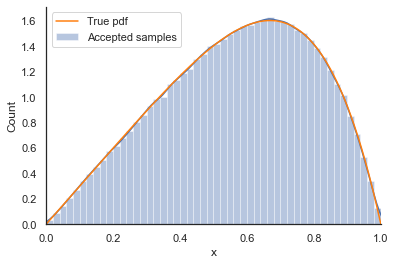

Proportion of samples accepted: 0.624051


In [6]:
# Set seed for reproducibility
seed = 512
random.seed(seed)

# Pick alpha and beta such that the tails of g~U(0,1) are heavier.
alpha = 2.
beta = 5
B = gamma(alpha)*gamma(beta)/gamma(alpha+beta)  # Constant in the density of f~Beta(alpha,beta)
c = 1.001  # sup(f/g) 

Num_samples = 10**6  # Number of samples

U = np.random.uniform(0,1,(Num_samples,1))  # Samples to accept or reject
X = np.random.uniform(0,1,(Num_samples,1))  # Samples from candidate density g ~ U(0,1)
g = 1 # density of U(0,1)
accepted_samples = []

for i in range(Num_samples):
    x = X[i,0]
    f = (x**(alpha-1) * (1-x**(beta-1)))/B  
    if U[i,0] < f/(g*c):
        accepted_samples.append(x)
        c = np.max((c,f/g))

accepted_samples = np.array(accepted_samples)


## Plot results
sns.set()
sns.set_style('whitegrid')
sns.set_style('white')

xt = np.linspace(0, 1, num=10**4)
f_density = (xt**(alpha-1) * (1-xt**(beta-1)))/B

sns.distplot(accepted_samples, hist=True, label='Accepted samples')  # Distribution of accepted samples
plt.plot(xt, f_density/np.sum(f_density[:-1]*np.diff(xt)), color='tab:orange',label='True pdf')  # True density

plt.xlim((0,1))
plt.xlabel('x')
plt.ylabel('Count')
plt.legend()
sns.despine()
plt.show()

print('Proportion of samples accepted:',
      len(accepted_samples)/Num_samples )

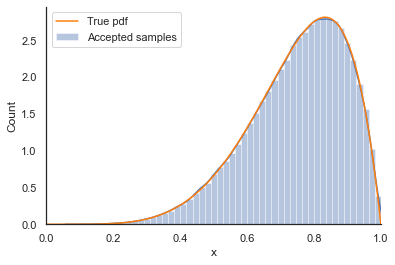

Proportion of samples accepted: 0.355646


In [5]:
# Set seed for reproducibility
seed = 512
random.seed(seed)

# Pick alpha and beta such that the tails of g~U(0,1) are heavier.
alpha = 6.
beta = 2.
B = gamma(alpha)*gamma(beta)/gamma(alpha+beta)  # Constant in the density of f~Beta(alpha,beta)
c = 1.001  # sup(f/g) 

Num_samples = 10**6  # Number of samples

U = np.random.uniform(0,1,(Num_samples,1))  # Samples to accept or reject
X = np.random.uniform(0,1,(Num_samples,1))  # Samples from candidate density g ~ U(0,1)
g = 1  # density of U(0,1)
accepted_samples = []

for i in range(Num_samples):
    x = X[i,0]
    f = (x**(alpha-1) * (1-x**(beta-1)))/B  
    if U[i,0] < f/(g*c):
        accepted_samples.append(x)
        c = np.max((c,f/g))

accepted_samples = np.array(accepted_samples)


## Plot results
sns.set()
sns.set_style('whitegrid')
sns.set_style('white')

xt = np.linspace(0, 1, num=10**4)
f_density = (xt**(alpha-1) * (1-xt**(beta-1)))/B

sns.distplot(accepted_samples, hist=True, label='Accepted samples')  # Distribution of accepted samples
plt.plot(xt, f_density/np.sum(f_density[:-1]*np.diff(xt)), color='tab:orange',label='True pdf')  # True pdf

plt.xlim((0,1))
plt.xlabel('x')
plt.ylabel('Count')
plt.legend()
sns.despine()
plt.show()

print('Proportion of samples accepted:',
      len(accepted_samples)/Num_samples )

Finally, we give an example where parameters are not chosen properly and therefore there is a slight difference in the results.

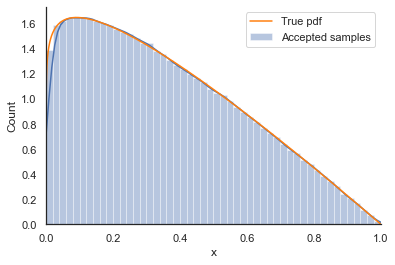

Proportion of samples accepted: 0.605368


In [4]:
# Set seed for reproducibility
seed = 512
random.seed(seed)

# Pick alpha and beta such that the tails of g~U(0,1) are heavier.
alpha = 1.1
beta = 2
B = gamma(alpha)*gamma(beta)/gamma(alpha+beta) # Constant in the density of f~Beta(alpha,beta)
c = 1.001  # sup(f/g) 


Num_samples = 10**6  # Number of samples

U = np.random.uniform(0,1,(Num_samples,1))  # Samples to accept or reject
X = np.random.uniform(0,1,(Num_samples,1))  # Samples from candidate density g ~ U(0,1)
g = 1  # density of U(0,1)
accepted_samples = []

for i in range(Num_samples):
    x = X[i,0]
    f = (x**(alpha-1) * (1-x**(beta-1)))/B  
    if U[i,0] < f/(g*c):
        accepted_samples.append(x)
        c = np.max((c,f/g))

accepted_samples = np.array(accepted_samples)


## Plot results
sns.set()
sns.set_style('whitegrid')
sns.set_style('white')

xt = np.linspace(0, 1, num=10**4)
f_density = (xt**(alpha-1) * (1-xt**(beta-1)))/B

sns.distplot(accepted_samples, hist=True, label='Accepted samples') # Distribution of accepted samples
plt.plot(xt, f_density/np.sum(f_density[:-1]*np.diff(xt)), color='tab:orange',label='True pdf')  # True density

plt.xlim((0,1))
plt.xlabel('x')
plt.ylabel('Count')
plt.legend()
sns.despine()
plt.show()

print('Proportion of samples accepted:',
      len(accepted_samples)/Num_samples )

## Results

Rejection sampling works remarkably well for values of $\alpha,\beta >1$, while for values lower than 1, no samples are accepted. This is because in rejection sampling, we need our candidate density to have heavier tails than the target distribution. For $\alpha,\beta<1$, the tails of the beta distribution are well above 1. 